## 基尼系数
![](https://upload-images.jianshu.io/upload_images/5760375-3cfb0d14e9d6dc0c.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 相对于信息熵的特点
- 熵由于要计算log,计算速度比信息熵稍慢
- 大多数效果没有特别的优劣

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [7]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth = 2, criterion = "gini")
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

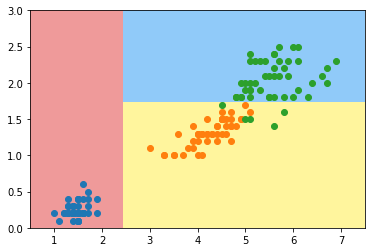

In [9]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## 模拟使用基尼系数进行划分

In [10]:
def split(X,y,d,value):
    #d是维度,value是数值
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    
    return X[index_a],X[index_b],y[index_a],y[index_b]
    #返回了被划分的两个区域的数据.

In [13]:
from collections import Counter

def gini(y):
    counter = Counter(y) 
    # 基尼系数单项初始化
    res = 1
    for num in counter.values():
        p = num / len(y)
        res += -p **2 
    return res


def try_split(X,y):

    best_g = float('inf')
    best_d,best_v = -1,-1

    #找到划分的维度
    for d in range(X.shape[1]):
        #对X的每个维度,按照大小顺序,取出每个值的索引.
        sorted_index = np.argsort(X[:,d])
        for i in range (1,len(X)) :
            if X[sorted_index[i-1],d] !=  X[sorted_index[i],d]:
                # 从同个维度,两个数中间,拿到划分值
                v = (X[sorted_index[i-1],d] + X[sorted_index[i],d]) / 2
                X_l,X_r,y_l,y_r = split (X,y,d,v)
                g = gini(y_l) + gini(y_r)
                if g < best_g:
                    best_g,best_d,best_v = g,d,v
    return best_g,best_d,best_v

In [18]:
best_g,best_d,best_v = try_split(X,y)
print("best_gini=", best_g)
print("best_d=",  best_d)
print("best_v=", best_v)

best_gini= 0.5
best_d= 0
best_v= 2.45


In [22]:
gini(y1_l)

0.0

In [19]:
X1_l,X1_r,y1_l,y1_r = split(X,y,best_d,best_v)

In [21]:
best_g2,best_d2,best_v2 = try_split(X1_r,y1_r)
print("best_g2=", best_g2)
print("best_d2=",  best_d2)
print("best_v2=", best_v2)

best_g2= 0.2105714900645938
best_d2= 1
best_v2= 1.75
